# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-Item2Cat-Map" data-toc-modified-id="Load-Item2Cat-Map-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Item2Cat Map</a></div><div class="lev2 toc-item"><a href="#Start-Here" data-toc-modified-id="Start-Here-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Start Here</a></div><div class="lev1 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev2 toc-item"><a href="#Category-vs-Reviews" data-toc-modified-id="Category-vs-Reviews-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Category vs Reviews</a></div><div class="lev2 toc-item"><a href="#Category-vs-Users" data-toc-modified-id="Category-vs-Users-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Category vs Users</a></div><div class="lev2 toc-item"><a href="#Dataset-Sample-Size-per-Category" data-toc-modified-id="Dataset-Sample-Size-per-Category-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dataset Sample Size per Category</a></div><div class="lev1 toc-item"><a href="#Extract-Reviews" data-toc-modified-id="Extract-Reviews-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract Reviews</a></div><div class="lev2 toc-item"><a href="#Load-Datasets" data-toc-modified-id="Load-Datasets-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load Datasets</a></div><div class="lev2 toc-item"><a href="#Extract-function-declaration" data-toc-modified-id="Extract-function-declaration-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extract function declaration</a></div><div class="lev2 toc-item"><a href="#Extraction-of-Data" data-toc-modified-id="Extraction-of-Data-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extraction of Data</a></div><div class="lev2 toc-item"><a href="#Store-Extracted-Dataset" data-toc-modified-id="Store-Extracted-Dataset-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Store Extracted Dataset</a></div>

In [3]:
import gzip as gz
import json
import pandas as pd

fname = '/home/alawlor/data/amazon_reviews/aggressive_dedup.json.gz'
#fname = '/home/alawlor/data/amazon_reviews/metadata.json.gz'
row=[]
def _gen():
    with gz.open(fname, 'rb') as f:
        for i,line in enumerate(f):
            obj = json.loads(line)
            #print(list(obj))
            #print("\n")
            """row="Unknown"
            if("categories" in list(obj)):
                row= [item[0] for item in obj['categories']]
                row= row[0]
            elif("salesRank" in list(obj)):
                #row=list(obj['salesRank'].values())[0]
                if (len(obj['salesRank'].values())>0):
                    key, = obj['salesRank']
                    row=key"""
            yield dict(asin=obj['asin'], reviewerID=obj['reviewerID'], overall=obj['overall'])
            
#_gen()

In [ ]:
df = pd.DataFrame(_gen())

In [7]:
df.head(10)

,asin,reviewText,reviewerID
0,B003UYU16G,It is and does exactly what the description sa...,A00000262KYZUE4J55XGL
1,B005FYPK9C,I was sketchy at first about these but once yo...,A000008615DZQRRI946FO
2,B000VEBG9Y,Very mobile product. Efficient. Easy to use; h...,A00000922W28P2OCH6JSE
3,B001EJMS6K,Easy to use a mobile. If you're taller than 4f...,A00000922W28P2OCH6JSE
4,B003XJCNVO,Love this feeder. Heavy duty & capacity. Best ...,A00000922W28P2OCH6JSE
5,B00G3KN9LI,"Solid, stable mount. Holds iPhone with phone p...",A00000922W28P2OCH6JSE
6,B000SAUVC4,I bought this pepper because I wanted a lot of...,A000013090ZI3HIT9N5V
7,B00125OS3C,Beautiful photos/film with wonderful music. G...,A00001362Q1PGIX2FYSSH
8,B002IGHX40,My idea of Colorado is &#34;Mountains&#34;. C...,A00001362Q1PGIX2FYSSH
9,B004WPCQKG,No matter what we did the bills just kept jamm...,A00001483M88NBD66LEP0


In [5]:
df.to_csv('userItemReview.csv')

In [ ]:
cats=df['categories'].unique()
cats

In [ ]:
item2cat=loadPickle("item2cat.pkl")
dataset=loadPickle("userItemRating.pkl")

In [ ]:
dataset=pd.merge(dataset, item2cat, on="asin", how="left")
del item2cat
dataset.head(10)

In [ ]:
df_grp = dataset[['categories','reviewerID']].groupby('categories', sort=False).agg({'categories': 'count',"reviewerID": lambda x: x.nunique()})
storePickle(df_grp,name="df_grpItem2Cat.pkl")

# Load Item2Cat Map

In [ ]:
item2cat=loadPickle("item2cat.pkl")
dataset=loadPickle("userItemRating.pkl")

In [ ]:
dataset=pd.merge(dataset, item2cat, on="asin", how="left")
del item2cat
dataset.head(10)

In [ ]:
df_grp = dataset[['categories','reviewerID']].groupby('categories', sort=False).agg({'categories': 'count',"reviewerID": lambda x: x.nunique()})
storePickle(df_grp,name="df_grpItem2Cat.pkl")

Here we dealing with 2 datasets:
- i. Category Dataset
- ii. Review Dataset

We load them up, and merge these dataset based on "asin", which corresponds to the item.
The created dataset "item2cat" thus then gives us an insight of the item belonging to a certain category. 

## Start Here

In [6]:
import pandas as pd
#Pickle store/load function

def storePickle(df=None,name="untitled.pkl"):
    df.to_pickle(name)
    
def loadPickle(name="untitled.pkl"):
    df=pd.read_pickle(name)
    return df

In [12]:
df_grp=loadPickle(name="df_grpItem2Cat.pkl")

We now just have to load the stored item2cat dataset, as we no longer need to repeat the process all over again.

# Plotting

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotCat(df=None,xlabel="",ylabel="",sortBy="",log="True", title="Plot"):
    df=df.sort_values(sortBy, ascending=False)
    df['catName'] = df.index
    plt.figure(figsize=(20,8))
    y_pos = np.arange(len(df['catName']))
    if(sortBy=="categories"):
        data = df["categories"]
    else:
        data = df["reviewerID"]
    
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, df['catName'], rotation=90)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if (log):
        plt.yscale('log')
    plt.title(title)
    plt.show()
    print("Total categories: ",len(df['catName'].unique()))
    print(df.head(10))
    

df_grp=loadPickle("df_grpItem2Cat.pkl")
df_grp=df_grp.sort_values('reviewerID', ascending=False)
df_grp['catName'] = df_grp.index
plt.figure(figsize=(20,8))
y_pos = np.arange(len(df_grp['catName']))
data = df_grp['reviewerID']
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, df_grp['catName'], rotation=90)
plt.ylabel('#Number of Unique Users')
#plt.yscale('log')
plt.title('Category vs Users')

plt.show()

We defined a plotting function above that can be called to display a graph, that puts "categories" on x axis and no. of reviews corresponding to that category in our dataset.

## Category vs Reviews

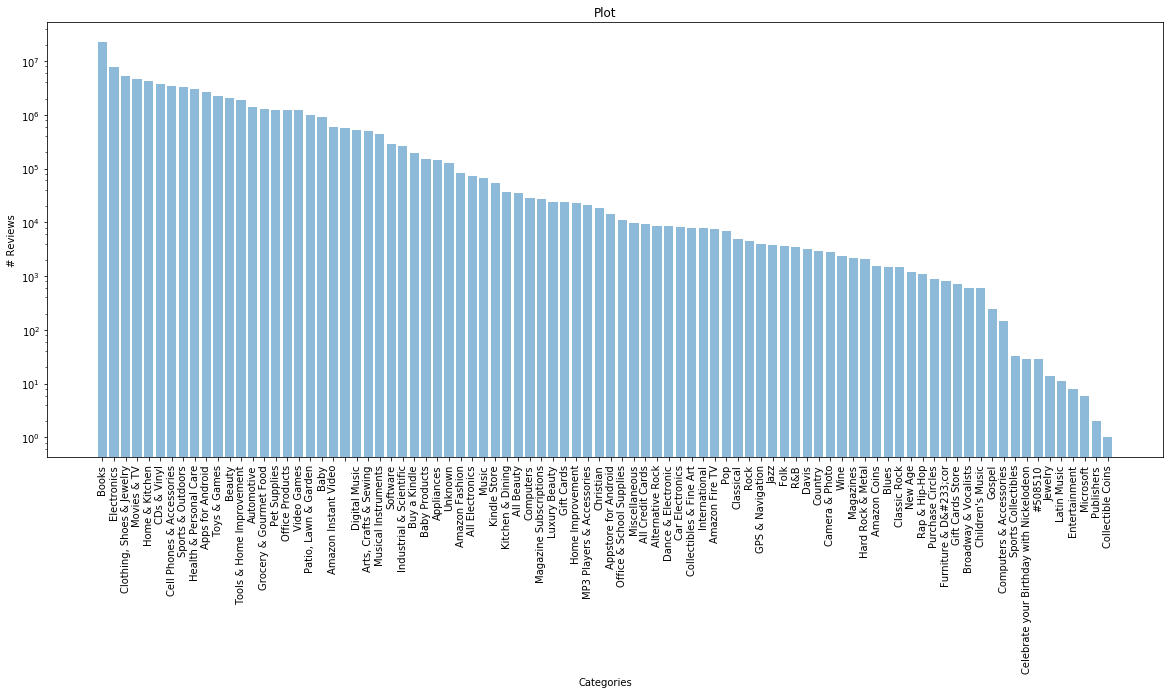

                           categories  reviewerID                    catName
categories                                                                  
Books                        22516062     8013531                      Books
Electronics                   7625663     4103975                Electronics
Clothing, Shoes & Jewelry     5357106     2954186  Clothing, Shoes & Jewelry
Movies & TV                   4565757     2064037                Movies & TV
Home & Kitchen                4248877     2505676             Home & Kitchen
CDs & Vinyl                   3770045     1575401                CDs & Vinyl
Cell Phones & Accessories     3432511     2249538  Cell Phones & Accessories
Sports & Outdoors             3234129     1966067          Sports & Outdoors
Health & Personal Care        2968775     1838976     Health & Personal Care
Apps for Android              2633247     1320903           Apps for Android


In [8]:
plotCat(df=df_grp,xlabel="Categories",ylabel="# Reviews",sortBy="categories")

As we can see here we have maximum reviews of items belonging to the "Books" category.<br/>
And total number of categories is 88.

## Category vs Users

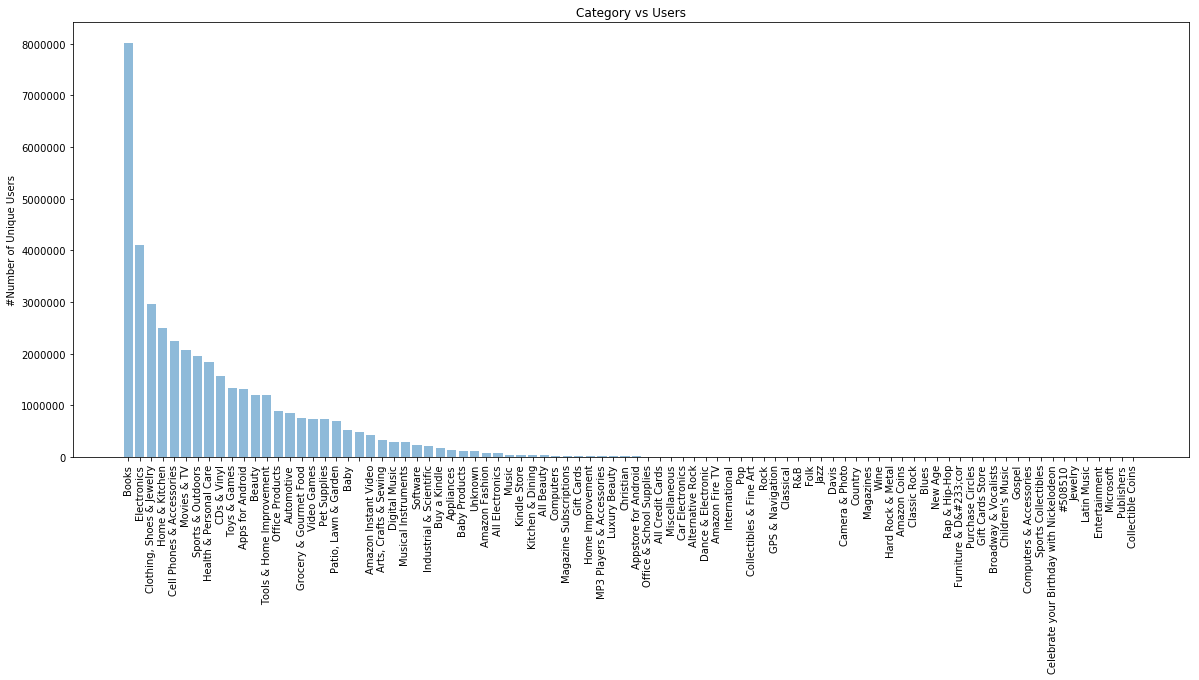

In [10]:
df_grp=loadPickle("df_grpItem2Cat.pkl")
df_grp=df_grp.sort_values('reviewerID', ascending=False)
df_grp['catName'] = df_grp.index
plt.figure(figsize=(20,8))
y_pos = np.arange(len(df_grp['catName']))
data = df_grp['reviewerID']
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, df_grp['catName'], rotation=90)
plt.ylabel('#Number of Unique Users')
#plt.yscale('log')
plt.title('Category vs Users')
plt.show()

The graph above shows the number of unique users that reviewed a items belonging to a category.
Books being the category with most users.

## Dataset Sample Size per Category

In [27]:
def calcPerc(category="Books"):
    df_grp=loadPickle("df_grpItem2Cat.pkl")
    df_grp['catName'] = df_grp.index
    try:
        cat=df_grp.loc[df_grp['catName'] == category, 'categories'].iloc[0]
        tot=df_grp['categories'].sum()
        return ((cat/tot)*100)
    except:
        print("Category not present!")
    

In [28]:
per=calcPerc("Movies & TV")
print("Dataset sample size: ",per,"%")

Dataset sample size:  5.76140989279 %


# Extract Reviews

## Load Datasets

In [21]:
item2cat=loadPickle("item2cat.pkl")
item2cat.head(10)

,asin,categories
0,0001048791,Books
1,0000143561,Movies & TV
2,0000037214,"Clothing, Shoes & Jewelry"
3,0000032069,Sports & Outdoors
4,0000031909,Sports & Outdoors
5,0000032034,Sports & Outdoors
6,0000589012,Movies & TV
7,0001048775,Books
8,0000031852,Sports & Outdoors
9,0001048236,Books


## Extract function declaration

In [9]:
def extract(df_cat=None,category="Movies & TV"):
    asinList=list(df_cat.loc[df_cat['categories'] == category, 'asin'])
    del df_cat
    df_dataset=pd.read_csv("userItemReviewRating.csv",names=['asin','reviewText','reviewerID','overall'], skiprows=1)
    df_dataset=df_dataset.loc[df_dataset['asin'].isin(asinList)]
    return df_dataset

## Extraction of Data

In [ ]:
dataset_sample = extract(df_cat=item2cat,category="Movies & TV")

In [7]:
len(dataset_sample)

4565757

## Store Extracted Dataset

In [8]:
storePickle(dataset_sample,name="extractedDataset.pkl")